# Chp8. 경사하강법

적합한 모델을 찾기 위해 모델의 오류를 최소화하는 방법

## 8.1 경사 하강법에 숨은 의미

실수 벡터를 입력하면 실수 하나를 출력해주는 함수 f가 있다고 하자.

In [1]:
def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

__gradient__는 함수가 가장 빠르게 증가(or감소)할 수 있는 방향을 나타낸다. 함수의 최댓값을 구하는 방법 중 하나는 임의의 시작점을 잡은 후, gradient를 계산하고, gradient의 방향으로 조금 이동하는 과정을 여러 번 반복하는 것이다.

![Image](figures/1.PNG)

이 방법은 global minimum이 존재하는 경우에는 좋으나, local minimum이 여러 개 있는 경우에는 시작점에 따라 잘못된 곳으로 빠질 수 있다. 최솟값이 존재하지 않는다면 과정이 영원히 끝나지 않을 수도 있다.

## 8.2 Gradient 계산하기

f가 단변수 함수인 경우, 점 x에서의 미분갑승ㄴ x가 아주 조금 변했을 때 f(x)의 변화량을 의미한다. x의 변화량을 다음 식에서는 h로 표기했으며, 아주 조금 변한다는 것을 반영하기 위해 h를 0에 점근하게 했다. 이때 미분값은 함수 변화율의 극한값이다.

In [2]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

In [3]:
def plot_estimated_derivative():

    def square(x):
        return x * x

    def derivative(x):
        return 2 * x

    derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

    # plot to show they're basically the same
    import matplotlib.pyplot as plt
    x = range(-10,10)
    plt.plot(x, list(map(derivative, x)), 'rx', label='Actual')           # red  x
    plt.plot(x, list(map(derivative_estimate, x)), 'b+',label='Estimate')  # blue +
    plt.legend(loc=9)
    plt.show()

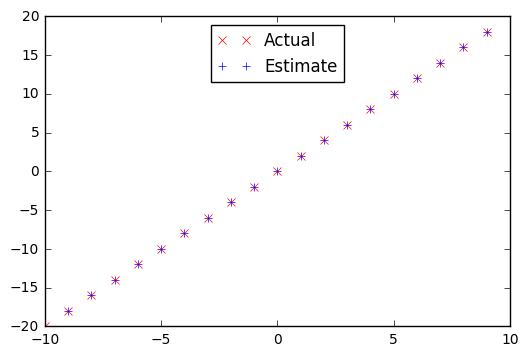

In [4]:
plot_estimated_derivative()

만약에 f가 다변수 함수라면, 여러 개의 입력 변수 중 하나에 작은 변화가 있을 때 f(x)의 변화량을 알려주는 편도함수 역시 여러 개 존재한다.

_i_번째 편도함수는, _i_번째 변수를 제외한 다른 모든 입력변수를 고정시켜서 계산할 수 있다.

In [5]:
def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

## 8.3 Gradient 적용하기

함수 sum_of_squares는 v가 0 벡터일 때 가장 작은 값을 가진다. 이 사실을 모른다고 가정하고, 경사 하강법을 이용해서 3차원 벡터의 최솟값을 구해보자. 임의의 시작점을 잡고, gradient가 아주 작아질 때까지 경사의 반대 방향으로 조금씩 이동한다.

In [6]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

import random

v = [random.randint(-10,10) for i in range(3)]
print(v)
tolerance = 0.000001

def distance(v,k):
    dis = [(a-b)**2 for a,b in zip(v,k)]
    return sum(dis)

while True:
    gradient = sum_of_squares_gradient(v)
    next_v = step(v, gradient, -0.01)
    if distance(next_v, v) < tolerance:
        break
    v = next_v
print(v)

[4, 3, -10]
[0.017809358525722886, 0.013357018894292168, -0.04452339631430723]


## 8.4 적절한 이동 거리 정하기

- 이동 거리를 고정
- 시간에 따라 이동 거리를 점차 줄임
- 이동할 때마다 목적 함수를 최소화하는 이동 거리로 정함

세 번째가 가장 좋아보이나, 계산 비용이 너무 크다. 몇몇 정해진 이동 거리를 시도해 보고 그 중에서 목적 함수를 가장 최소화하는 값을 고르는 방법도 있다.

In [7]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

그런데 이 중 몇몇은 f에 부적합한 값을 넣어 오류를 발생시킬 수도 있다. 따라서 우리는 safe라는 함수를 만들어 f에 오류가 발생했을 때 무한대를 반환하기로 한다.

In [8]:
def safe(f):
    """define a new function that wraps f and return it"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')         # this means "infinity" in Python
    return safe_f

## 8.5 종합하기

대부분의 경우 최소화하려는 함수 target_fn과 그에 대한 gradient 함수 gradient_fn이 존재한다. 예를 들어, target_fn이 특정 모델의 파타미터에 대한 오류값 함수라고 하자. 경사 하강법을 이용하면 오류값을 최소화하는 파라미터를 찾을 수 있다.

파라미터 theta_0의 시작점을 구했다고 해보자. 그러면 경사 하강법을 다음과 같이 구현할 수 있다.

In [9]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """use gradient descent to find theta that minimizes target function"""

    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

    theta = theta_0                           # set theta to initial value
    target_fn = safe(target_fn)               # safe version of target_fn
    value = target_fn(theta)                  # value we're minimizing

    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]

        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

minimize_batch 함수는 반복문을 돌 때마다 데이터셋 전체를 살펴본다. 즉 target_fn이 데이터셋 전체에 대한 에러를 반환한다. 반대로, 다음 절에서는 한 번에 하나의 데이터 포인터를 보는 방법에 대해 살펴볼 것이다.

최대화를 하려는 경우에는 목적 함수의 음수값을 최소화하면 된다.

In [10]:
def negate(f):
    """return a function that for any input x returns -f(x)"""
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn),
                          theta_0,
                          tolerance)

## 8.6 SGD(stochastic gradient descent)

batch로 돌리는 경우, 계산량이 많아 시간이 오래 걸린다.

대부분의 오류 함수는 더할 수 있는 속성을 가지고 있다. 즉 데이터 전체에 대한 오류값이 각각 데이터 포인트에 대한 오류값의 합과 같다. 이럴 때는 한 번 반복문을 돌 때마다 데이터 포인트 한 개에 대한 gradient를 계산하는 SGD를 사용할 수 있다. SGD는 수렴할 때까지 전체 데이터셋을 반복적으로 사용한다. 한 번 반복문을 돌 때마다 임의의 순서대로 데이터 포인트를 사용한다.

In [11]:
def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]  # create a list of indexes
    random.shuffle(indexes)                    # shuffle them
    for i in indexes:                          # return the data in that order
        yield data[i]

각 데이터 포인트에 대해 gradient를 계산하면 되지만, 이렇게 하면 최적해 근방에서 영원히 떠돌게 될 수도 있다. 함수값이 한동안 줄지 않으면 이동 거리를 줄이고 최종적으로 알고리즘을 종료하도록 한다.

In [12]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = list(zip(x, y))
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta

In [13]:
# 최대화 버전

def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)

# Chp9. 파이썬으로 데이터 수집하기

## 9.1 stdin과 stdout


In [14]:
import sys, re

regex = sys.argv[1]

for line in sys.stdin:
    if re.search(regex, line):
        sys.stdout.write(line)

In [15]:
import sys
count = 0
for line in sys.stdin:
    count += 1
print(count)

0


__ type Somfile.txt | python egrep.py "[0-9]" | python line_count.py__

| 는 파이프 기호이며, 왼쪽의 출력을 오른편의 입력으로 사용하라는 의미다.

이번에는 입력되는 문서의 단어를 모두 세어 보고 가장 자주 나오는 단어를 출력해 주는 코드를 작성해 보자.

In [ ]:
import sys
from collections import Counter

try:
    num_words = int(sys.argv[1])
except:
    print("usage: most_common_words.py num_words")
    sys.exit(1)

counter = Counter(word.lower()
                  for line in sys.stdin for word in line.strip().split() if word)

for word, count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sys.stdout.write("\t")
    sys.stdout.write(word)
    sys.stdout.write("\n")

__ type 대나무숲.txt | python most_common_words.py 10__

을 입력하면 된다.

## 9.2 파일 읽기

### 9.2.1 텍스트 파일의 기본

텍스트 파일을 작업하기 위해서는 가장 먼저 open으로 파일 객체를 불러와야 한다.

In [ ]:
file_for_reading = open("위치", 'r')

file_for_writing = open("위치", 'w')

file_for_appending = open("위치", 'a')

file_for_writing.close()

항상 작업이 끝나면 파일을 저절로 닫아주는 __with__

In [ ]:
with open(filename,'r') as f:
    data = function_that_gets_data_from(f)
process(data)

만약 텍스트 파일 전체가 필요하다면, for문을 이용하여 모든 줄을 반복해서 불러올 수 있다.

In [ ]:
start_with_hash = 0
with open('input.txt','r') as f:
    for line in f:
        if re.match("^#",line):
            starts_with_hash += 1

각 줄마다 이메일 주소가 적혀있는 파일을 사용해서 히스토그램을 그려야 한다고 생각하자. @ 뒤에 있는 부분을 도메인으로 볼 수 있다.

In [ ]:
def get_domain(email_address):
    """'@ 기준으로 주소를 자르고 마지막 부분을 반환"""
    return email_address.lower().split("@")[-1]

with open('email_addresses.txt','r') as f:
    domain_counts = Counter(get_domain(line.strip()) for line in f if "@" in line)

## 9.2.2 구분자가 있는 파일

데이터는 탭이나 쉼표 등으로 구분된 경우가 많다.

예를 들어, 탭으로 분리 된 주가 파일이 주어졌다면,

다음 코드로 처리할 수 있다.

In [ ]:
import csv

with open('tab_delimited_stock_prices.txt', 'rb') as f:
    reader = csv.reader(f,delimiter = '\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        process(date, symbol, closing_price)

만약 파일에 헤더가 포함되어 있다면,

첫 줄에서 reader.next()를 사용해서 헤더 행을 건너뛰거나 csv.DictREader를 통해 헤더를 key로 사용하는 dict로 저장할 수 있다.

In [ ]:
import csv

with open('tab_delimited_stock_prices.txt', 'rb') as f:
    reader = csv.DictReader(f,delimiter = '\t')
    for row in reader:
        date = row["date"]
        symbol = row["symbol"]
        closing_price = float(row["closing_price"])
        process(date, symbol, closing_price)

파일에 헤더가 없더라도 fieldnames 파라미터로 key를 설정해서 DictReader를 사용할 수 있다.


또한 csv.writer를 사용해서 구분자가 있는 파일을 생성할 수도 있다.

In [ ]:
today_prices = {'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5}

with open('comma_delimited_stock_prices.txt','wb') as f:
    writer = csv.writer(f, delimiter = ',')
    for stock, price in today_prices.items():
        writer.writerow([stock,price])

In [ ]:
results = [["test1", "success", "Monday"],
["test2", "success, kind of", "Tuesday"],
["test3", "failure, kind of", "Wednesday"],
["test4", "failure, utter", "Thursday"]]

# don't do this!
with open('bad_csv.txt', 'wb') as f:
for row in results:
f.write(",".join(map(str, row))) # might have too many commas in it!
f.write("\n") # row might have newlines as well!

## 9.3 웹 스크래핑

웹페이지를 갖고 오는 것은 굉장히 쉬운 작업이다. 하지만 의미있고 구조화된 정보를 갖고 오는 것은 그렇게 쉬운 일은 아니다.

### 9.3.1 HTML과 파싱

웹페이지는 HTML로 작성되었고 HTML의 내용은 (이상적인 경우) 요소(element)와 속성(attribute)로 구성되어 있다.

모든 웹페이지의 HTML 형태가 쉽게 긁어 올 수 있게 구성되어 있다면, 'id가 subject인 요소에 포함되어 있는 텍스트를 찾아줘'같은 규칙으로 필요한 정보를 추출할 수 있을 것이다. 하지만 실제로는 제대로 된 형태를 갖추거나 주석이 달린 HTML을 찾기 힘들기 때문에 HTML을 이해하는 데 도움을 줄 수 있는 도구가 필요하다.

HTML에서 데이터를 추출하기 위해 웹페이지의 HTML 요소를 나무(tree) 구조로 저장해서 쉽게 접근하게 해주는 __BeautifulSoup__ 라이브러리를 사용할 것이다. 그리고 기본 라이브러리보다 훨씬 더 효과적으로 HTTP 요청을 할 수 있는 __requests__ 라이브러리를 설치하자.

In [16]:
from bs4 import BeautifulSoup
import requests
html = requests.get("http://www.naver.com").text
soup = BeautifulSoup(html, 'html5lib')

In [17]:
first_paragraph = soup.find('p')
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()

print(first_paragraph)
print(first_paragraph_text)
print(first_paragraph_words)

<p>네이버 메인을 나눔글꼴로 보기 위해서는<br/><span> 나눔글꼴을 설치</span>해야 합니다.<br/>나눔글꼴을 설치하시겠습니까?</p>
네이버 메인을 나눔글꼴로 보기 위해서는 나눔글꼴을 설치해야 합니다.나눔글꼴을 설치하시겠습니까?
['네이버', '메인을', '나눔글꼴로', '보기', '위해서는', '나눔글꼴을', '설치해야', '합니다.나눔글꼴을', '설치하시겠습니까?']


태그를 dict인 것처럼 사용함으로써 태그의 속성을 추출할 수 있다.

In [18]:
first_paragraph_id2 = soup.p.get('id') # id가 없다면 None을 반환
print(first_paragraph_id2)
first_paragraph_id = soup.p['id']      # id가 존재하지 않으면 KeyError

None


KeyError: 'id'

여러 태그를 한번에 불러올 수도 있다.

In [19]:
all_paragraph = soup.find_all('p')
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]

그리고 특정 class의 태그가 필요한 경우도 자주 있을 것이다.

In [20]:
important_paragraphs = soup('p', {'class' : 'important'})
important_paragraphs2 = soup('p', 'important')
important_paragraphs3 = [p for p in soup('p') if 'important' in p.get('class', [])]

In [21]:
# 주의 : 만약 여러 <div>안에 똑같은 <span>이 존재한다면, 동일한 <span>이 중복으로 반환된다.
spans_inside_divs = [span for div in soup('div') for span in div('span')]

### 9.3.2 예시: 오라일리의 데이터 관련 책

오라일리 출판사가 데이터 분석에 관련해 지금까지 출판한 책의 수를 살펴보자.

http://shop.oreilly.com/category/browse-subjects/data.do?sortby=publicationDate&page=1

악의적으로 사이트에 접속하는 것이 아니거나 웹 스크래퍼가 차단 당하는 것을 원치 않는다면 가장 먼저 사이트의 접근 정책을 확인해야 한다.

http://www.oreilly.com/terms/

접근 정책에서 문제가 없다면, 크롤러가 어떻게 작동해야 하는지 규제하고 있는 robots.txt를 확인해보자.

http://www.oreilly.com/robots.txt

In [22]:
url = "http://shop.oreilly.com/category/browse-subjects/data.do?sortby=publicationDate&page=1"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html><head>
        

























  









<!--Janrain SSO JavaScripts -->


<!-- Script added to resolve JS error coming on IE-8 for Janrain login -->
<script>
	document.getElementsByClassName = 
	Element.prototype.getElementsByClassName = function(class_names) {
		// Turn input in a string, prefix space for later space-dot substitution
		class_names = (' ' + class_names)
			// Escape special characters
			.replace(/[~!@$%^&*()_+\-=,./';:"?><[\]{}|`#]/g, '\$&')
			// Normalize whitespace, right-trim
			.replace(/\s*(\s|$)/g, '$1')
			// Replace spaces with dots for querySelectorAll
			.replace(/\s/g, '.');
		return this.querySelectorAll(class_names);
	};
</script>



  
  
    
      
    
  


<meta content="SKYPE_TOOLBAR_PARSER_COMPATIBLE" name="SKYPE_TOOLBAR"/>

<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>



  
  
     <meta content="summar

In [23]:
tds = soup('td','thumbtext')
print(len(tds))

30


비디오는 걸러내보자. 자세히 살펴보면 모든 td 요소는 class 이름이 pricelabel인 sapn 요소를 적어도 하나 이상은 포함하고 있는 것을 확인할 수 있다. 그리고 pricelabel은 Ebook:이나 Video: 혹은 Print:라는 텍스트를 갖고 있다. 비디오는 하나의 pricelabel만 가지고 있으며 이는 Video라는 텍스트만 포함하고 있는 것을 확인할 수 있다. 다음과 같이 비디오를 걸러 낼 수 있다.

In [24]:
def is_video(td):
    """it's a video if it has exactly one pricelabel, and if
    the stripped text inside that pricelabel starts with 'Video'"""
    pricelabels = td('span', 'pricelabel')
    return (len(pricelabels) == 1 and
            pricelabels[0].text.strip().startswith("Video"))
print(len([td for td in tds if not is_video(td)]))

21


In [25]:
import re

def book_info(td):
    """given a BeautifulSoup <td> Tag representing a book,
    extract the book's details and return a dict"""

    title = td.find("div", "thumbheader").a.text
    by_author = td.find('div', 'AuthorName').text
    authors = [x.strip() for x in re.sub("^By ", "", by_author).split(",")]
    isbn_link = td.find("div", "thumbheader").a.get("href")
    isbn = re.match("/product/(.*)\.do", isbn_link).groups()[0]
    date = td.find("span", "directorydate").text.strip()

    return {
        "title" : title,
        "authors" : authors,
        "isbn" : isbn,
        "date" : date
    }

In [26]:
from bs4 import BeautifulSoup
import requests
from time import sleep
base_url = "http://shop.oreilly.com/category/browse-subjects/data.do?sortby=publicationDate&page="

books = []

NUM_PAGES = 44

for page_num in range(1,NUM_PAGES + 1):
    print ("souping page", page_num, ",", len(books), " found so far")
    url = base_url + str(page_num)
    soup = BeautifulSoup(requests.get(url).text, 'html5lib')
    
    for td in soup('td', 'thumbtext'):
        if not is_video(td):
            books.append(book_info(td))
    
    # sleep(30)

souping page 1 , 0  found so far
souping page 2 , 21  found so far
souping page 3 , 50  found so far
souping page 4 , 76  found so far
souping page 5 , 97  found so far
souping page 6 , 119  found so far
souping page 7 , 142  found so far
souping page 8 , 169  found so far
souping page 9 , 191  found so far
souping page 10 , 215  found so far
souping page 11 , 241  found so far
souping page 12 , 262  found so far
souping page 13 , 283  found so far
souping page 14 , 311  found so far
souping page 15 , 335  found so far
souping page 16 , 361  found so far
souping page 17 , 384  found so far
souping page 18 , 408  found so far
souping page 19 , 434  found so far
souping page 20 , 456  found so far
souping page 21 , 482  found so far
souping page 22 , 510  found so far
souping page 23 , 535  found so far
souping page 24 , 562  found so far
souping page 25 , 591  found so far
souping page 26 , 619  found so far
souping page 27 , 646  found so far
souping page 28 , 672  found so far
souping

데이터를 모았으니, 연도별로 출판된 책의 수를 그래프로 그려 보자

In [27]:
def get_year(book):
    """book["date"] looks like 'November 2014' so we need to
    split on the space and then take the second piece"""
    return int(book["date"].split()[1])

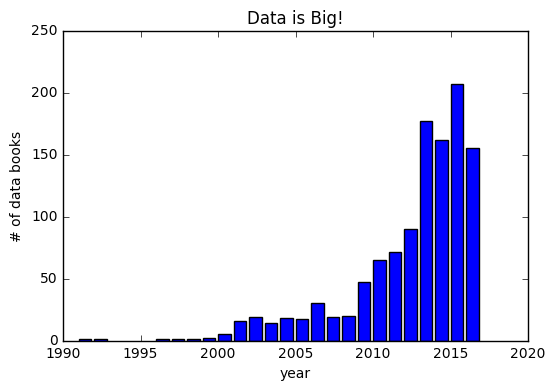

In [28]:
from collections import Counter

year_counts = Counter(get_year(book) for book in books if get_year(book) <= 2016)

import matplotlib.pyplot as plt
years = sorted(year_counts)
book_counts = [year_counts[year] for year in years]
plt.bar(years, book_counts)
plt.xlabel("year")
plt.ylabel("# of data books")
plt.title("Data is Big!")
plt.show()

안타깝게도 잠재적 투자자는 그래프를 보며 데이터 분석의 유행은 2013년 이후로 끝났다고 결정을 내렸다.

## 9.4 API 사용하기

많은 웹사이트는 API(application programming interface)를 통해 사이트의 데이터를 구조화된 형태로 제공해 주고 있다. API를 사용하면 직접 스크래핑을 할 필요가 없어진다!

### 9.4.1 JSON(그리고 XML)

텍스트를 교환하기 위해 사용되는 통신 규약인 HTTP를 따라 API를 통해 요청하는 데이터는 직렬화된 문자열 형태로 유지되어 있어야 한다. 대부분의 경우, 직렬화 구조로 JSON(JavaScript Object Notation)을 사용한다. JSON은 파이썬의 dict와 비슷하다 보니 데이터를 이해하기 쉽게 표현해 준다.

파이썬의 json 모듈을 통해 JSON을 파싱할 수 있다. 모듈의 loads 함수를 사용하면 직렬화된 문자열 형태의 JSON 객체를 파이썬 객체로 분리시킬 수 있다.

In [29]:
import json

serialized = """{ "title" : "Data Science Book",
"author" : "Joel Grus",
"publicationYear" : 2014,
"topics" : [ "data", "science", "data science"] }"""

# parse the JSON to create a Python dict

deserialized = json.loads(serialized)
if "data science" in deserialized["topics"]:
    print(deserialized)

{'publicationYear': 2014, 'topics': ['data', 'science', 'data science'], 'author': 'Joel Grus', 'title': 'Data Science Book'}


가끔씩 API 제공자가 당신을 싫어해서 결과를 XML 형태로 주는 경우도 있다.

### 9.4.2 인증이 필요하지 않은 API 사용하기

대부분의 API를 사용하기 위해서는 사용자 인증을 해야만 한다. 사용자 인증이 없어도 간단한 작업을 할 수 있는 깃허브 API를 살펴보자.

In [30]:
import requests, json
endpoint = "https://api.github.com/users/rmflsnr/repos"

repos = json.loads(requests.get(endpoint).text)
repos

[{'archive_url': 'https://api.github.com/repos/rmflsnr/pythonproject/{archive_format}{/ref}',
  'assignees_url': 'https://api.github.com/repos/rmflsnr/pythonproject/assignees{/user}',
  'blobs_url': 'https://api.github.com/repos/rmflsnr/pythonproject/git/blobs{/sha}',
  'branches_url': 'https://api.github.com/repos/rmflsnr/pythonproject/branches{/branch}',
  'clone_url': 'https://github.com/rmflsnr/pythonproject.git',
  'collaborators_url': 'https://api.github.com/repos/rmflsnr/pythonproject/collaborators{/collaborator}',
  'comments_url': 'https://api.github.com/repos/rmflsnr/pythonproject/comments{/number}',
  'commits_url': 'https://api.github.com/repos/rmflsnr/pythonproject/commits{/sha}',
  'compare_url': 'https://api.github.com/repos/rmflsnr/pythonproject/compare/{base}...{head}',
  'contents_url': 'https://api.github.com/repos/rmflsnr/pythonproject/contents/{+path}',
  'contributors_url': 'https://api.github.com/repos/rmflsnr/pythonproject/contributors',
  'created_at': '2016-09

In [31]:
from dateutil.parser import parse

dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

In [32]:
last_3_repositories = sorted(repos, key=lambda r:r["created_at"], reverse=True)[:3]
last_3_languages = [repo["language"] for repo in last_3_repositories]
last_3_languages

['Jupyter Notebook']

### 9.4.3 API 찾기

다양한 API가 있으니 찾아보도록 하자. 없다면 최후의 보루인 스크래핑이 있다는 것을 기억하자.

## 9.5 예시: 트위터 API 사용하기

트위터 API로는 twython을 추천한다.

### 9.5.1 인증 받기

1. Go to https://apps.twitter.com/.
2. If you are not signed in, click Sign in and enter your Twitter username and password.
3. Click Create New App.
4. Give it a name (such as “Data Science”) and a description, and put any URL as the website (it doesn’t matter which one).
5. Agree to the Terms of Service and click Create.
6. Take note of the consumer key and consumer secret.
7. Click “Create my access token.”
8. Take note of the access token and access token secret (you may have to refresh the page).

### 9.5.2 Twython 사용하기

먼저 특정 트윗을 검색할 수 있게 해주는 Search API를 살펴보자. 이를 사용하기 위해서는 access token과 secret은 필요없지만, consumer key와 secret은 필요하다.

In [35]:
from twython import Twython

twitter = Twython(
    "XDLHtDMe722HehuBcjvl8ML9W", "JXy84BmneMz95zbJeBVJIr8x1G0bwD0huAwyi4l1r7xJUEctXv") # CONSUMER_KEY / CONSUMER_SECRET

for status in twitter.search(q='"버거킹"')["statuses"]:
    user = status["user"]["screen_name"]
    text = status["text"]
    when = status["created_at"]
    print(when," ",user, ":", text)
    print("-"*100)

Tue Nov 15 05:46:40 +0000 2016   ____929____ : 둘다 별로, 고양이, 참치마요, 바다,롯데월드, ㅂㅓ거킹 

#같은취향찾기_액션vs스릴러_강아지vs고양이_참치마요vs전주비빔_산vs바다_롯데월드vs에버랜드_맥도날드vs버거킹vs롯데리아
----------------------------------------------------------------------------------------------------
Tue Nov 15 05:46:21 +0000 2016   o808b : 버거킹. . ? 알바 가릴 처지는 아니지만 친구가 알바하다가 기름 때문에 다쳤다는 걸 들은 이후로 좀 많이 꺼려짐 ,, 서빙알바가 나을까나...
----------------------------------------------------------------------------------------------------
Tue Nov 15 05:45:56 +0000 2016   c_a_gi : 스릴러 고양이 전주비빔 집 집 버거킹 #같은취향찾기_액션vs스릴러_강아지vs고양이_참치마요vs전주비빔_산vs바다_롯데월드vs에버랜드_맥도날드vs버거킹vs롯데리아
----------------------------------------------------------------------------------------------------
Tue Nov 15 05:44:57 +0000 2016   poiuu_hb : 스릴러 강아지 참치마요 바다 에버랜드 버거킹

사실 공포, 둘다, 매운거, 안힘든거, 맘스터치...
 #같은취향찾기_액션vs스릴러_강아지vs고양이_참치마요vs전주비빔_산vs바다_롯데월드vs에버랜드_맥도날드vs버거킹vs롯데리아
----------------------------------------------------------------------------------------------------
Tue Nov 15 05:44:16 +0

트위터 Search API는 임의로 몇 개의 트윗만 보여 주기 때문에 특별히 흥미로운 내용을 찾기 힘들다. 보통 데이터 과학을 하기 위해서는 이보다 훨씬 많은 트윗이 필요할 것이다. 더 많은 트윗을 탐색하기 위해서는 Streaming API를 사용하는 것이 효과적이다. Streaming API는 훨씬 많은 양의 트윗을 불러올 수 있게 해준다. 이를 사용하기 위해서는 access token으로 사용자 인증을 해야 한다.

In [39]:
from twython import TwythonStreamer
# appending data to a global variable is pretty poor form
# but it makes the example much simpler
tweets = []

class MyStreamer(TwythonStreamer):
    """our own subclass of TwythonStreamer that specifies
    how to interact with the stream"""

    def on_success(self, data):
        """what do we do when twitter sends us data?
        here data will be a Python dict representing a tweet"""
    
        # only want to collect English-language tweets
        if data['lang'] == 'ko':
            tweets.append(data)
            print ("received tweet #", len(tweets))
    
        # stop when we've collected enough
        if len(tweets) >= 200:
            self.disconnect()
    def on_error(self, status_code, data):
        print (status_code, data)
        self.disconnect()
        
stream = MyStreamer("XDLHtDMe722HehuBcjvl8ML9W", "JXy84BmneMz95zbJeBVJIr8x1G0bwD0huAwyi4l1r7xJUEctXv",
                    "1138316515-7vOhmzz93X45lg4GlQOd1EtFLvwkkI0kgTei9wq", "DjJFN9zWAPkbc6DIoct5Yf033x04WFaBlSCPQSPCLLZYG")

stream.statuses.filter(track='박근혜')

received tweet # 1
received tweet # 2
received tweet # 3
received tweet # 4
received tweet # 5
received tweet # 6
received tweet # 7
received tweet # 8
received tweet # 9
received tweet # 10
received tweet # 11
received tweet # 12
received tweet # 13
received tweet # 14
received tweet # 15
received tweet # 16
received tweet # 17
received tweet # 18
received tweet # 19
received tweet # 20
received tweet # 21
received tweet # 22
received tweet # 23
received tweet # 24
received tweet # 25
received tweet # 26
received tweet # 27
received tweet # 28
received tweet # 29
received tweet # 30
received tweet # 31
received tweet # 32
received tweet # 33
received tweet # 34
received tweet # 35
received tweet # 36
received tweet # 37
received tweet # 38
received tweet # 39
received tweet # 40
received tweet # 41
received tweet # 42
received tweet # 43
received tweet # 44
received tweet # 45
received tweet # 46
received tweet # 47
received tweet # 48
received tweet # 49
received tweet # 50
received 

다음 코드를 통해 가장 자주 사용된 해시 태그를 찾아볼 수 있다.

In [40]:
top_hashtags = Counter(hashtag['text'].lower() for tweet in tweets for hashtag in tweet["entities"]["hashtags"])

print(top_hashtags.most_common(5))

[('박근혜', 5), ('최순실특검', 4), ('우병우_구속수사', 4), ('최순실', 2), ('문재인', 2)]
